In [5]:
file_name = "data_apopto"
list_file = os.listdir(file_name)
list_file

['movie1apo20.csv',
 'movie9apo4.csv',
 'movie2apo1.csv',
 'movie4apo3.csv',
 'movie12apo2.csv',
 'movie6apo1.csv',
 'movie10apo2.csv',
 'movie1apo21.csv',
 'movie6apo3.csv',
 'movie2apo2.csv',
 'movie10apo1.csv',
 'movie7apo3.csv',
 'movie6apo2.csv',
 'movie12apo1.csv',
 'movie9apo2.csv',
 'movie7apo2.csv',
 'movie6apo4.csv',
 'movie4apo12.csv',
 'movie4apo2.csv',
 'movie7apo1.csv',
 'movie1apo6.csv',
 'movie7apo4.csv']

In [6]:
data = pd.read_csv(file_name+"/"+list_file[0], index_col='Unnamed: 0', sep=',')

for f in list_file[1:]:
    d = pd.read_csv(file_name+"/"+f, index_col='Unnamed: 0', sep=',')
    data = pd.concat((data, d))
# inversion dû au sens des pixels...
data['y_a']=-data['y_a']
data['angle_position'] = np.arctan2(data['y_a'].to_numpy(), data['x_a'].to_numpy())
data['angle_position_degre'] = data['angle_position']/np.pi*180
data

,area,x,y,major,minor,angle,AR,x_a,y_a,angle_position,angle_position_degre
apo1,28.905,22.078,15.122,8.948,4.113,171.154,2.175541,NaN,NaN,NaN,NaN
apo2,0.234,20.264,15.550,0.680,0.438,161.565,1.552511,NaN,NaN,NaN,NaN
apo3,0.468,20.048,16.112,1.148,0.519,154.330,2.211946,NaN,NaN,NaN,NaN
1,11.786,13.309,13.002,4.177,3.592,126.608,1.162862,-8.769,2.120,2.904383,166.408916
2,7.203,16.957,14.698,4.317,2.124,131.424,2.032486,-3.307,0.852,2.889441,165.552764
...,...,...,...,...,...,...,...,...,...,...,...
2,7.483,16.540,13.021,3.886,2.452,80.519,1.584829,2.033,1.702,0.697008,39.935612
3,7.904,17.234,13.115,3.329,3.023,177.952,1.101224,2.698,0.958,0.341191,19.548823
1,26.099,19.906,19.816,6.637,5.006,114.779,1.325809,5.388,-3.949,-0.632483,-36.238621
2,25.210,18.600,17.478,7.706,4.165,130.046,1.850180,4.093,-2.755,-0.592444,-33.944513


In [7]:
data.loc['1'].shape

(125, 11)

In [18]:
import random
id_ = random.sample(range(0,len(data.loc[ii])), 60)


# Plot all data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


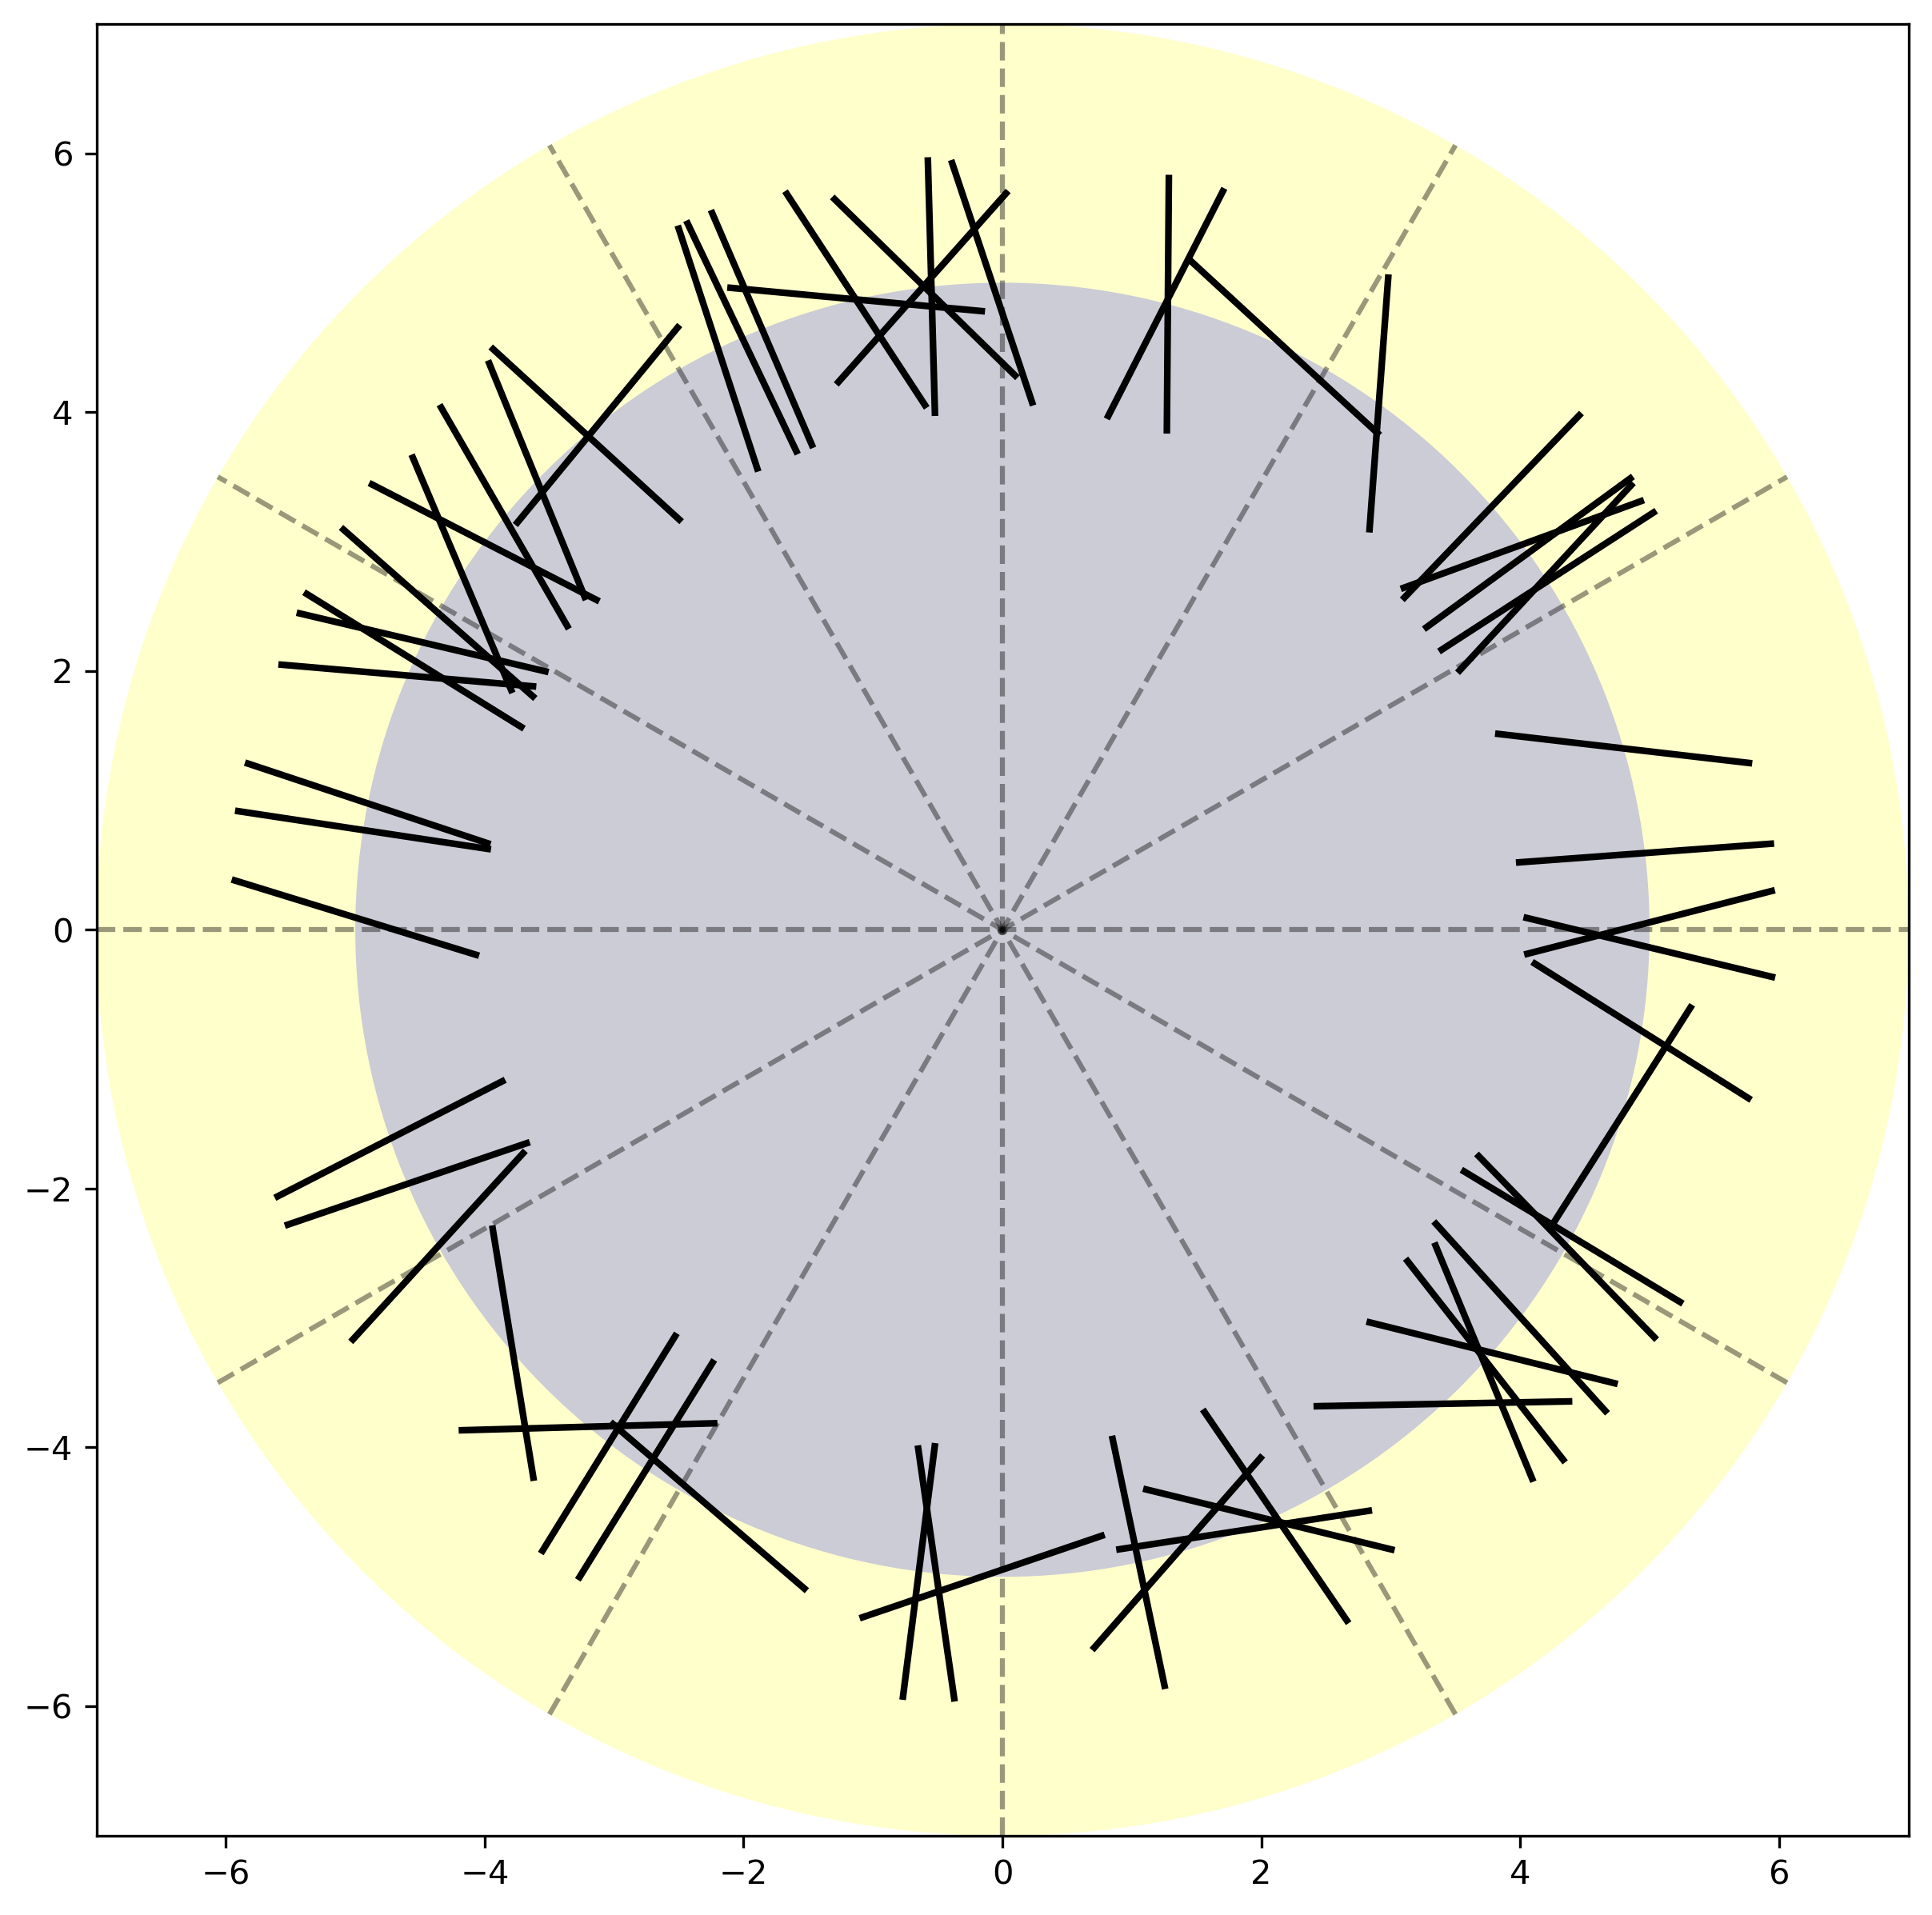

In [22]:
from matplotlib import collections  as mc
plt.figure(figsize=(10, 10), dpi=300)
ax = plt.subplot(111, polar=False)



ii = ('3')

angle            = data.loc[ii].iloc[id_]['angle_position'].to_numpy()
cell_orientation = data.loc[ii].iloc[id_]['angle'].to_numpy()*np.pi/180
length           = data.loc[ii].iloc[id_]['AR'].to_numpy()
length = np.repeat(2, len(angle))
outer = 5

circle1 = plt.Circle((0, 0), outer+2, 
                    fill=True, 
                    color='yellow', 
                    alpha = 0.2, 
                    linewidth=0)
circle2 = plt.Circle((0, 0), outer, 
                    fill=True, 
                    color='blue', 
                    alpha = 0.2, 
                    linewidth=0)

ax.add_artist(circle1)
ax.add_artist(circle2)

X_start = ((outer*np.cos(angle)) -
            (length/2 * np.cos(cell_orientation)
            )
            )

Y_start = ((outer*np.sin(angle)) -
            (length/2 * np.sin(cell_orientation)
            )
            )

X_end = ((outer*np.cos(angle)) +
            (length/2 * np.cos(cell_orientation)
            )
            )

Y_end = ((outer*np.sin(angle)) +
            (length/2 * np.sin(cell_orientation)
            )
            )

lines = []
for i in range(len(X_start)):
    lines.append([(X_start[i], Y_start[i]), (X_end[i], Y_end[i])])

lc = mc.LineCollection(lines, colors='black', linewidths=2)
ax.add_collection(lc)


ax.set_aspect('equal')



ax.set_xlim(-outer-2, outer+2)
ax.set_ylim(-outer-2, outer+2)

outer+=2

ax.plot([0,0], [-outer,outer], 'k--', alpha = 0.4)
ax.plot([-outer,outer], [0,0], 'k--', alpha = 0.4)
ax.plot([np.cos(5*np.pi/6)*outer, -np.cos(5*np.pi/6)*outer], [-np.sin(5*np.pi/6)*outer, np.sin(5*np.pi/6)*outer], 'k--', alpha = 0.4)
ax.plot([-np.cos(5*np.pi/6)*outer, np.cos(5*np.pi/6)*outer], [-np.sin(5*np.pi/6)*outer, np.sin(5*np.pi/6)*outer], 'k--', alpha = 0.4)
ax.plot([np.cos(4*np.pi/6)*outer, -np.cos(4*np.pi/6)*outer], [-np.sin(4*np.pi/6)*outer, np.sin(4*np.pi/6)*outer], 'k--', alpha = 0.4)
ax.plot([-np.cos(4*np.pi/6)*outer, np.cos(4*np.pi/6)*outer], [-np.sin(4*np.pi/6)*outer, np.sin(4*np.pi/6)*outer], 'k--', alpha = 0.4)




plt.savefig(ii+"apopto.eps", dpi=300)
# plt.savefig("_"+ii+".png", dpi=75)

In [74]:
# Recalcul de l'angle entre 0° et 180°
data['angle_'] = [180+a if a<0 else a for a in data.angle]
data['angle_position_degre_'] = [180+a if a<0 else a for a in data.angle_position_degre]
data['diff'] = abs(data['angle_position_degre_'] - data['angle_'])
# data['diff'] = [180-a if a>90 else a for a in data['diff']]

In [78]:

n1 = np.histogram(data.loc['1']['diff'], bins=36, range=(0,190))
n2 = np.histogram(data.loc['2']['diff'], bins=36, range=(0,190))
n3 = np.histogram(data.loc['3']['diff'], bins=36, range=(0,190))



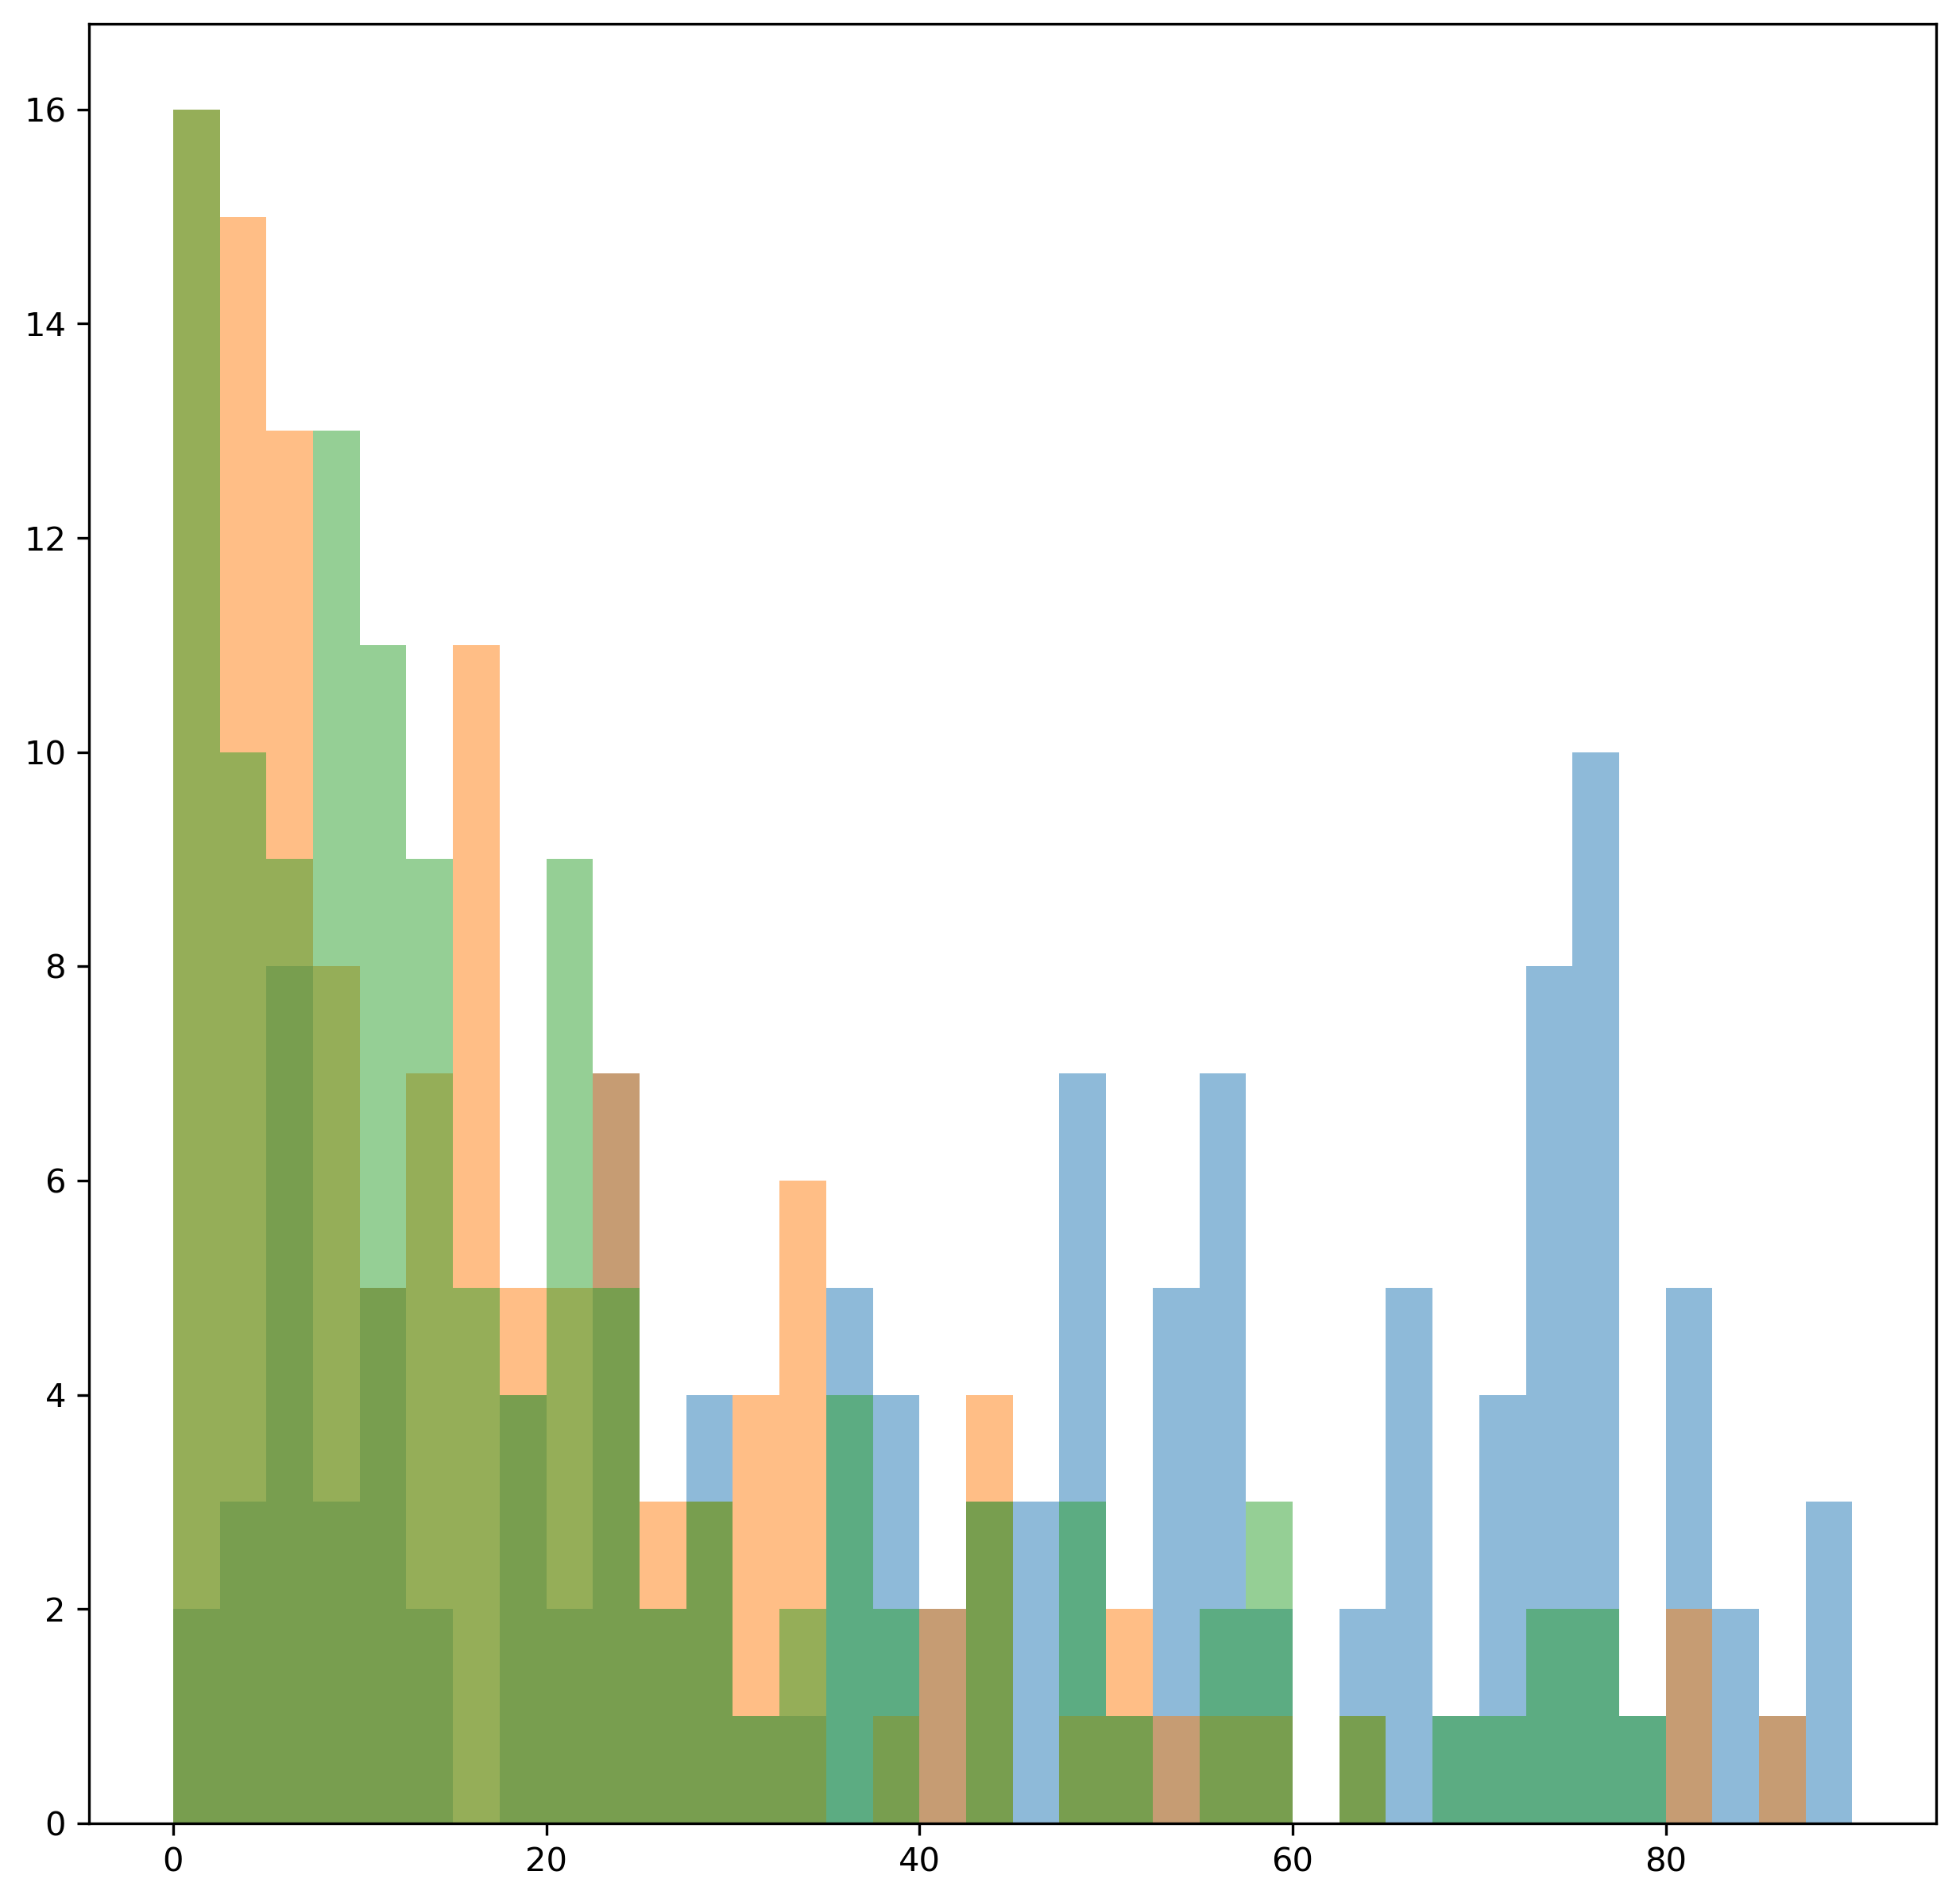

In [26]:
fig= plt.figure(figsize=(10, 10), dpi=300)
ax = fig.add_subplot(111, polar=False)
ax.hist(data.loc['1']['diff'], bins=36, range=(0,90), alpha=0.5)
ax.hist(data.loc['2']['diff'], bins=36, range=(0,90), alpha=0.5)
ax.hist(data.loc['3']['diff'], bins=36, range=(0,90), alpha=0.5)
plt.savefig("hist.svg", dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(array([ 6,  8,  6,  6,  9,  6,  4,  6, 13,  4,  6,  4,  6,  6,  5,  8,  6,
       12,  4]), array([-90.        , -80.52631579, -71.05263158, -61.57894737,
       -52.10526316, -42.63157895, -33.15789474, -23.68421053,
       -14.21052632,  -4.73684211,   4.73684211,  14.21052632,
        23.68421053,  33.15789474,  42.63157895,  52.10526316,
        61.57894737,  71.05263158,  80.52631579,  90.        ]))
[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218
 2.0943951  2.26892803 2.44346095 2.61799388 2.7925268  2.96705973
 3.14159265]
[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218
 2.0943951  2.26892803 2.44346095 2.61799388 2.7925268  2.96705973
 3.14159265]
[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633 1.74532925 1.91986218
 2.0943951  2.26892803 2.443

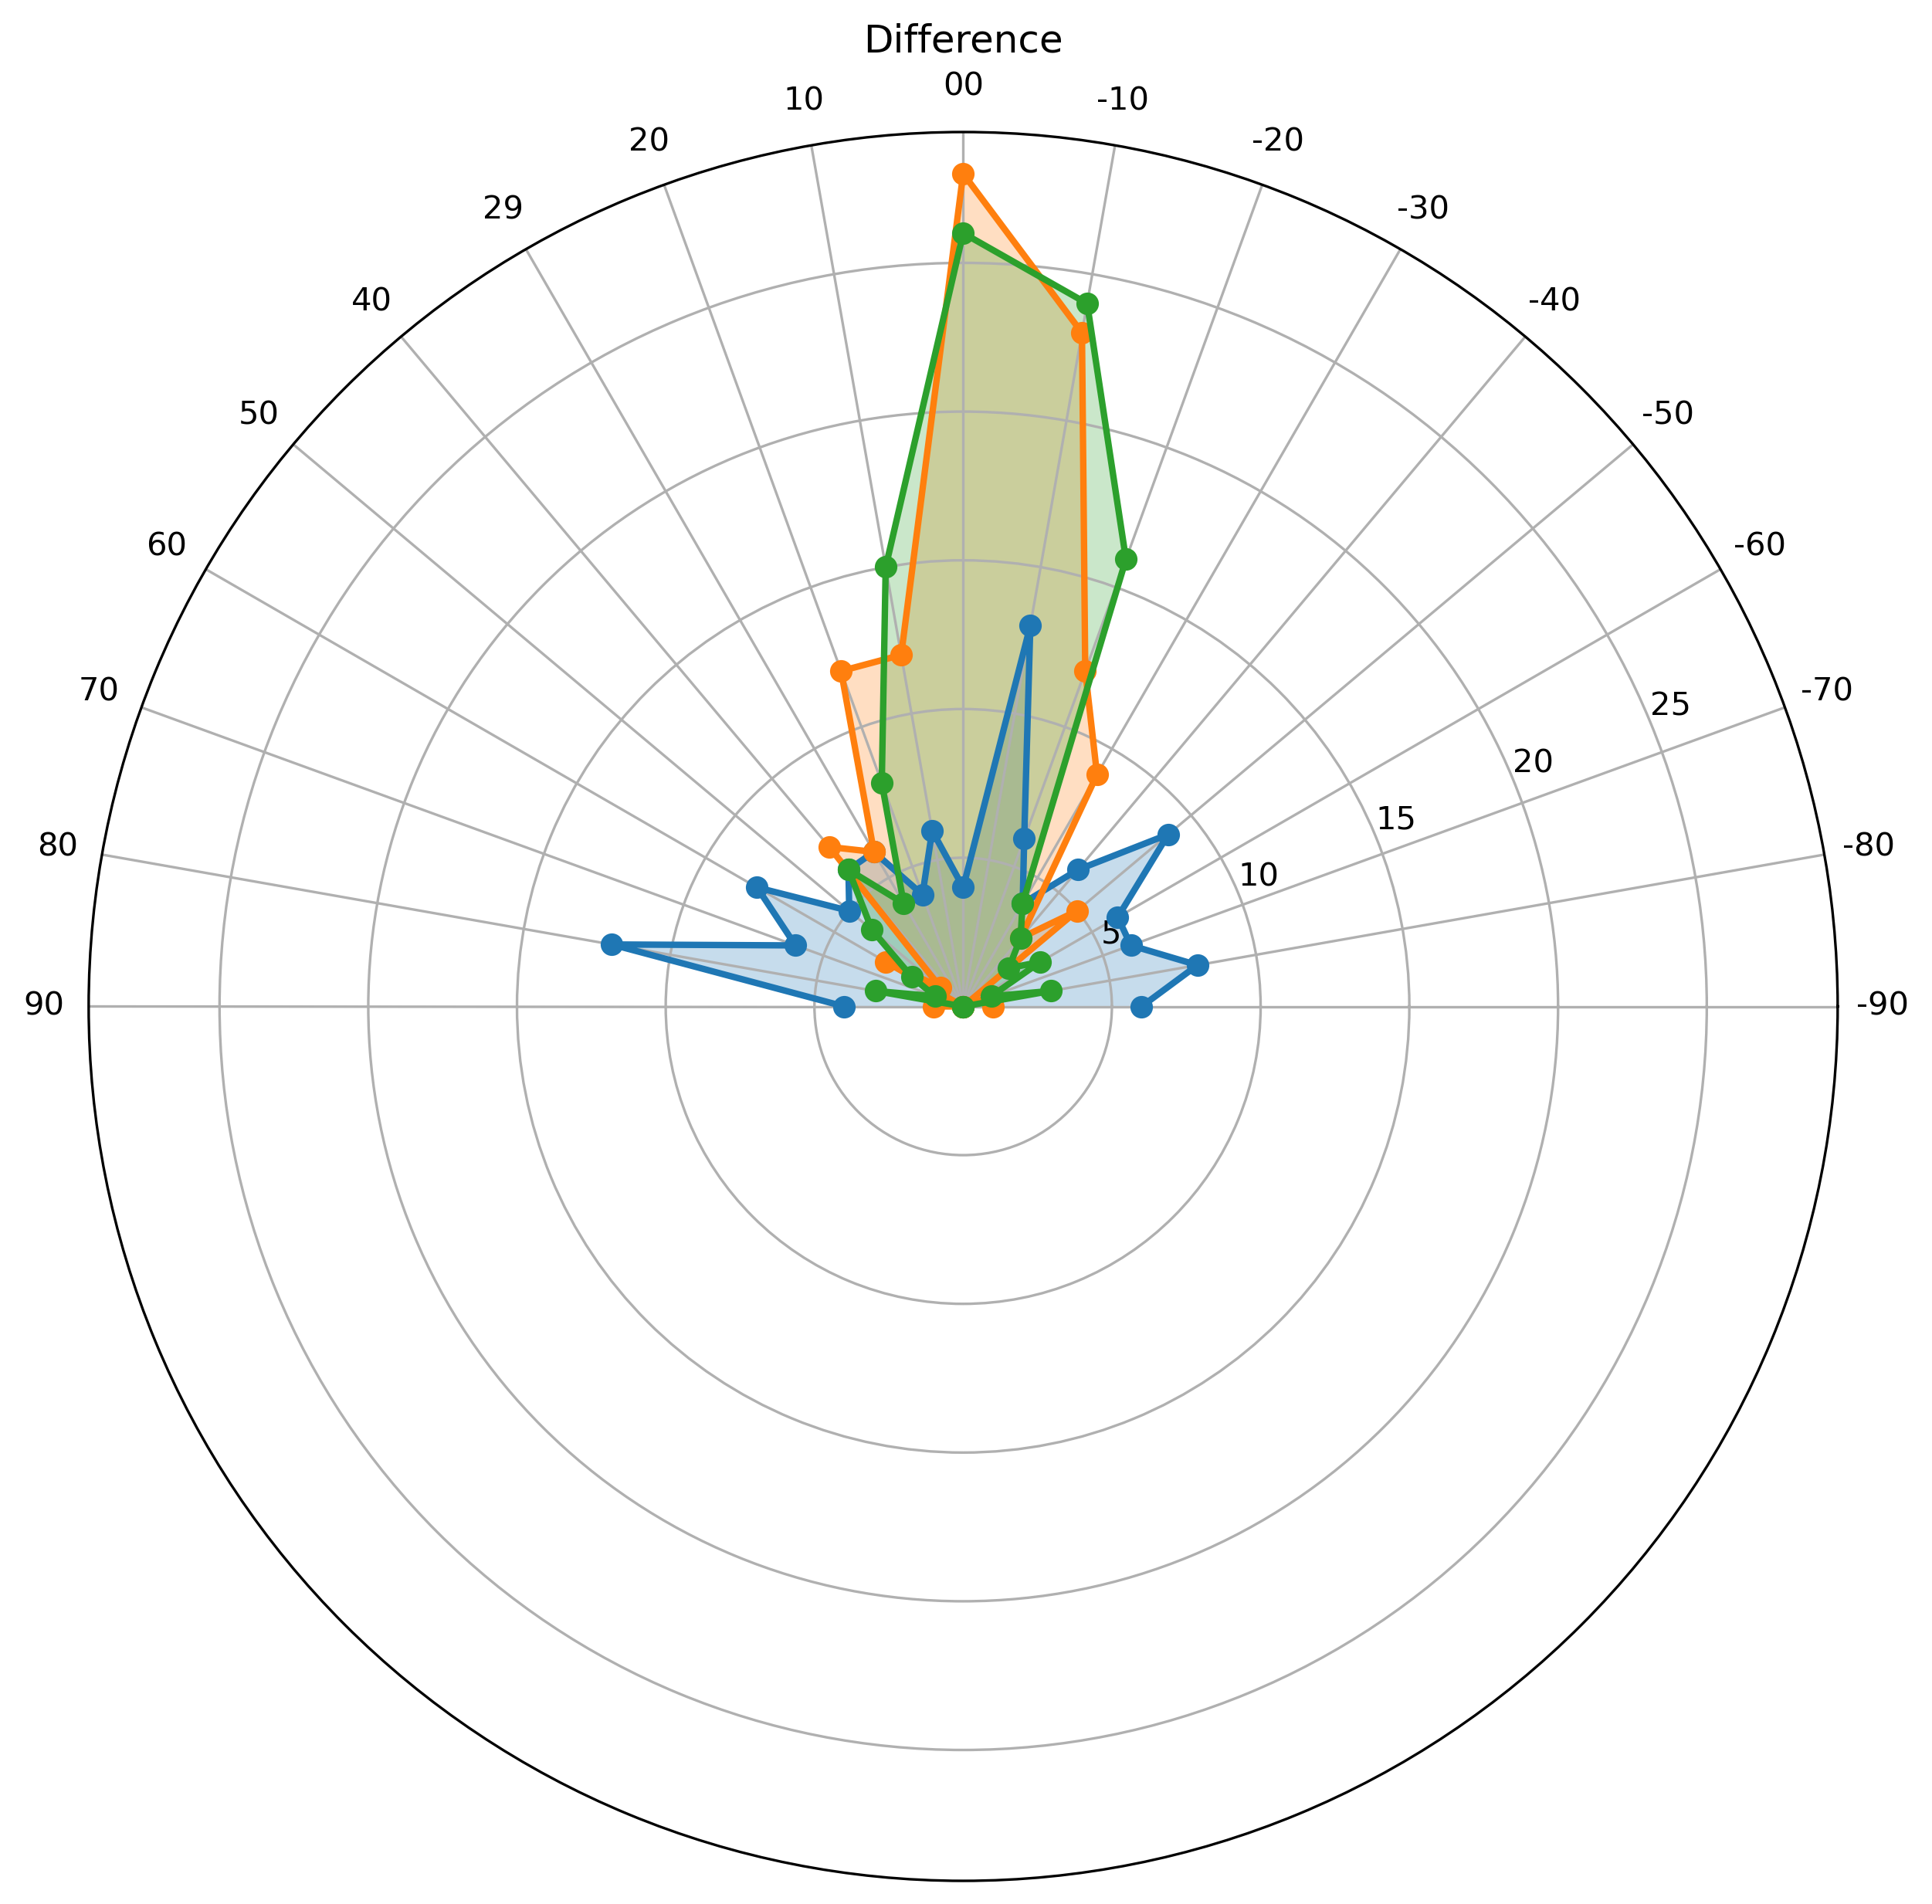

In [148]:
import matplotlib.pyplot as plt
import numpy as np

def make_radar_chart(name, 
                     stats, 
                     attribute_labels = "", 
                     plot_markers = "", 
                     plot_str_markers = "",
                    ax=None):

    labels = np.array(attribute_labels)


    #     angles = stats[1]
#     angles = np.concatenate((angles, [angles[0]]))
    angles = np.linspace(0, np.pi, len(stats[0]), endpoint=True)
#     angles= np.concatenate((angles,[np.pi/2]))
    print(angles)
    stats = stats[0]
#     stats = np.concatenate(stats)
    
    
    if ax==None:
        fig= plt.figure(figsize=(10, 10), dpi=300)
        ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    
    sr = []
    for r in angles:
        r = r * 180/np.pi -90
        sr.append('%02i' % r)
    ax.set_thetagrids(angles * 180/np.pi, sr)
    
    ax.set_title(name)
    ax.grid(True)


    return ax


# Recalcul de l'angle entre 0° et 180°
data['angle_'] = [180+a if a<0 else a for a in data.angle]
data['angle_position_degre_'] = [180+a if a<0 else a for a in data.angle_position_degre]
data['diff'] = (data['angle_position_degre_'] - data['angle_'])
data['diff'] = [180-a if a>90 else a for a in data['diff']]
data['diff'] = [-180-a if a<-90 else a for a in data['diff']]

n1 = np.histogram(data.loc['1']['diff'], bins=19, range=(-90,90))
n2 = np.histogram(data.loc['2']['diff'], bins=19, range=(-90,90))
n3 = np.histogram(data.loc['3']['diff'], bins=19, range=(-90,90))

print(n1)

ax = make_radar_chart("Difference", n1) # example
ax = make_radar_chart("Difference", n2, ax=ax) # example
ax = make_radar_chart("Difference", n3, ax=ax) # example

plt.savefig("radar_apopto_90-90.eps", dpi=300)

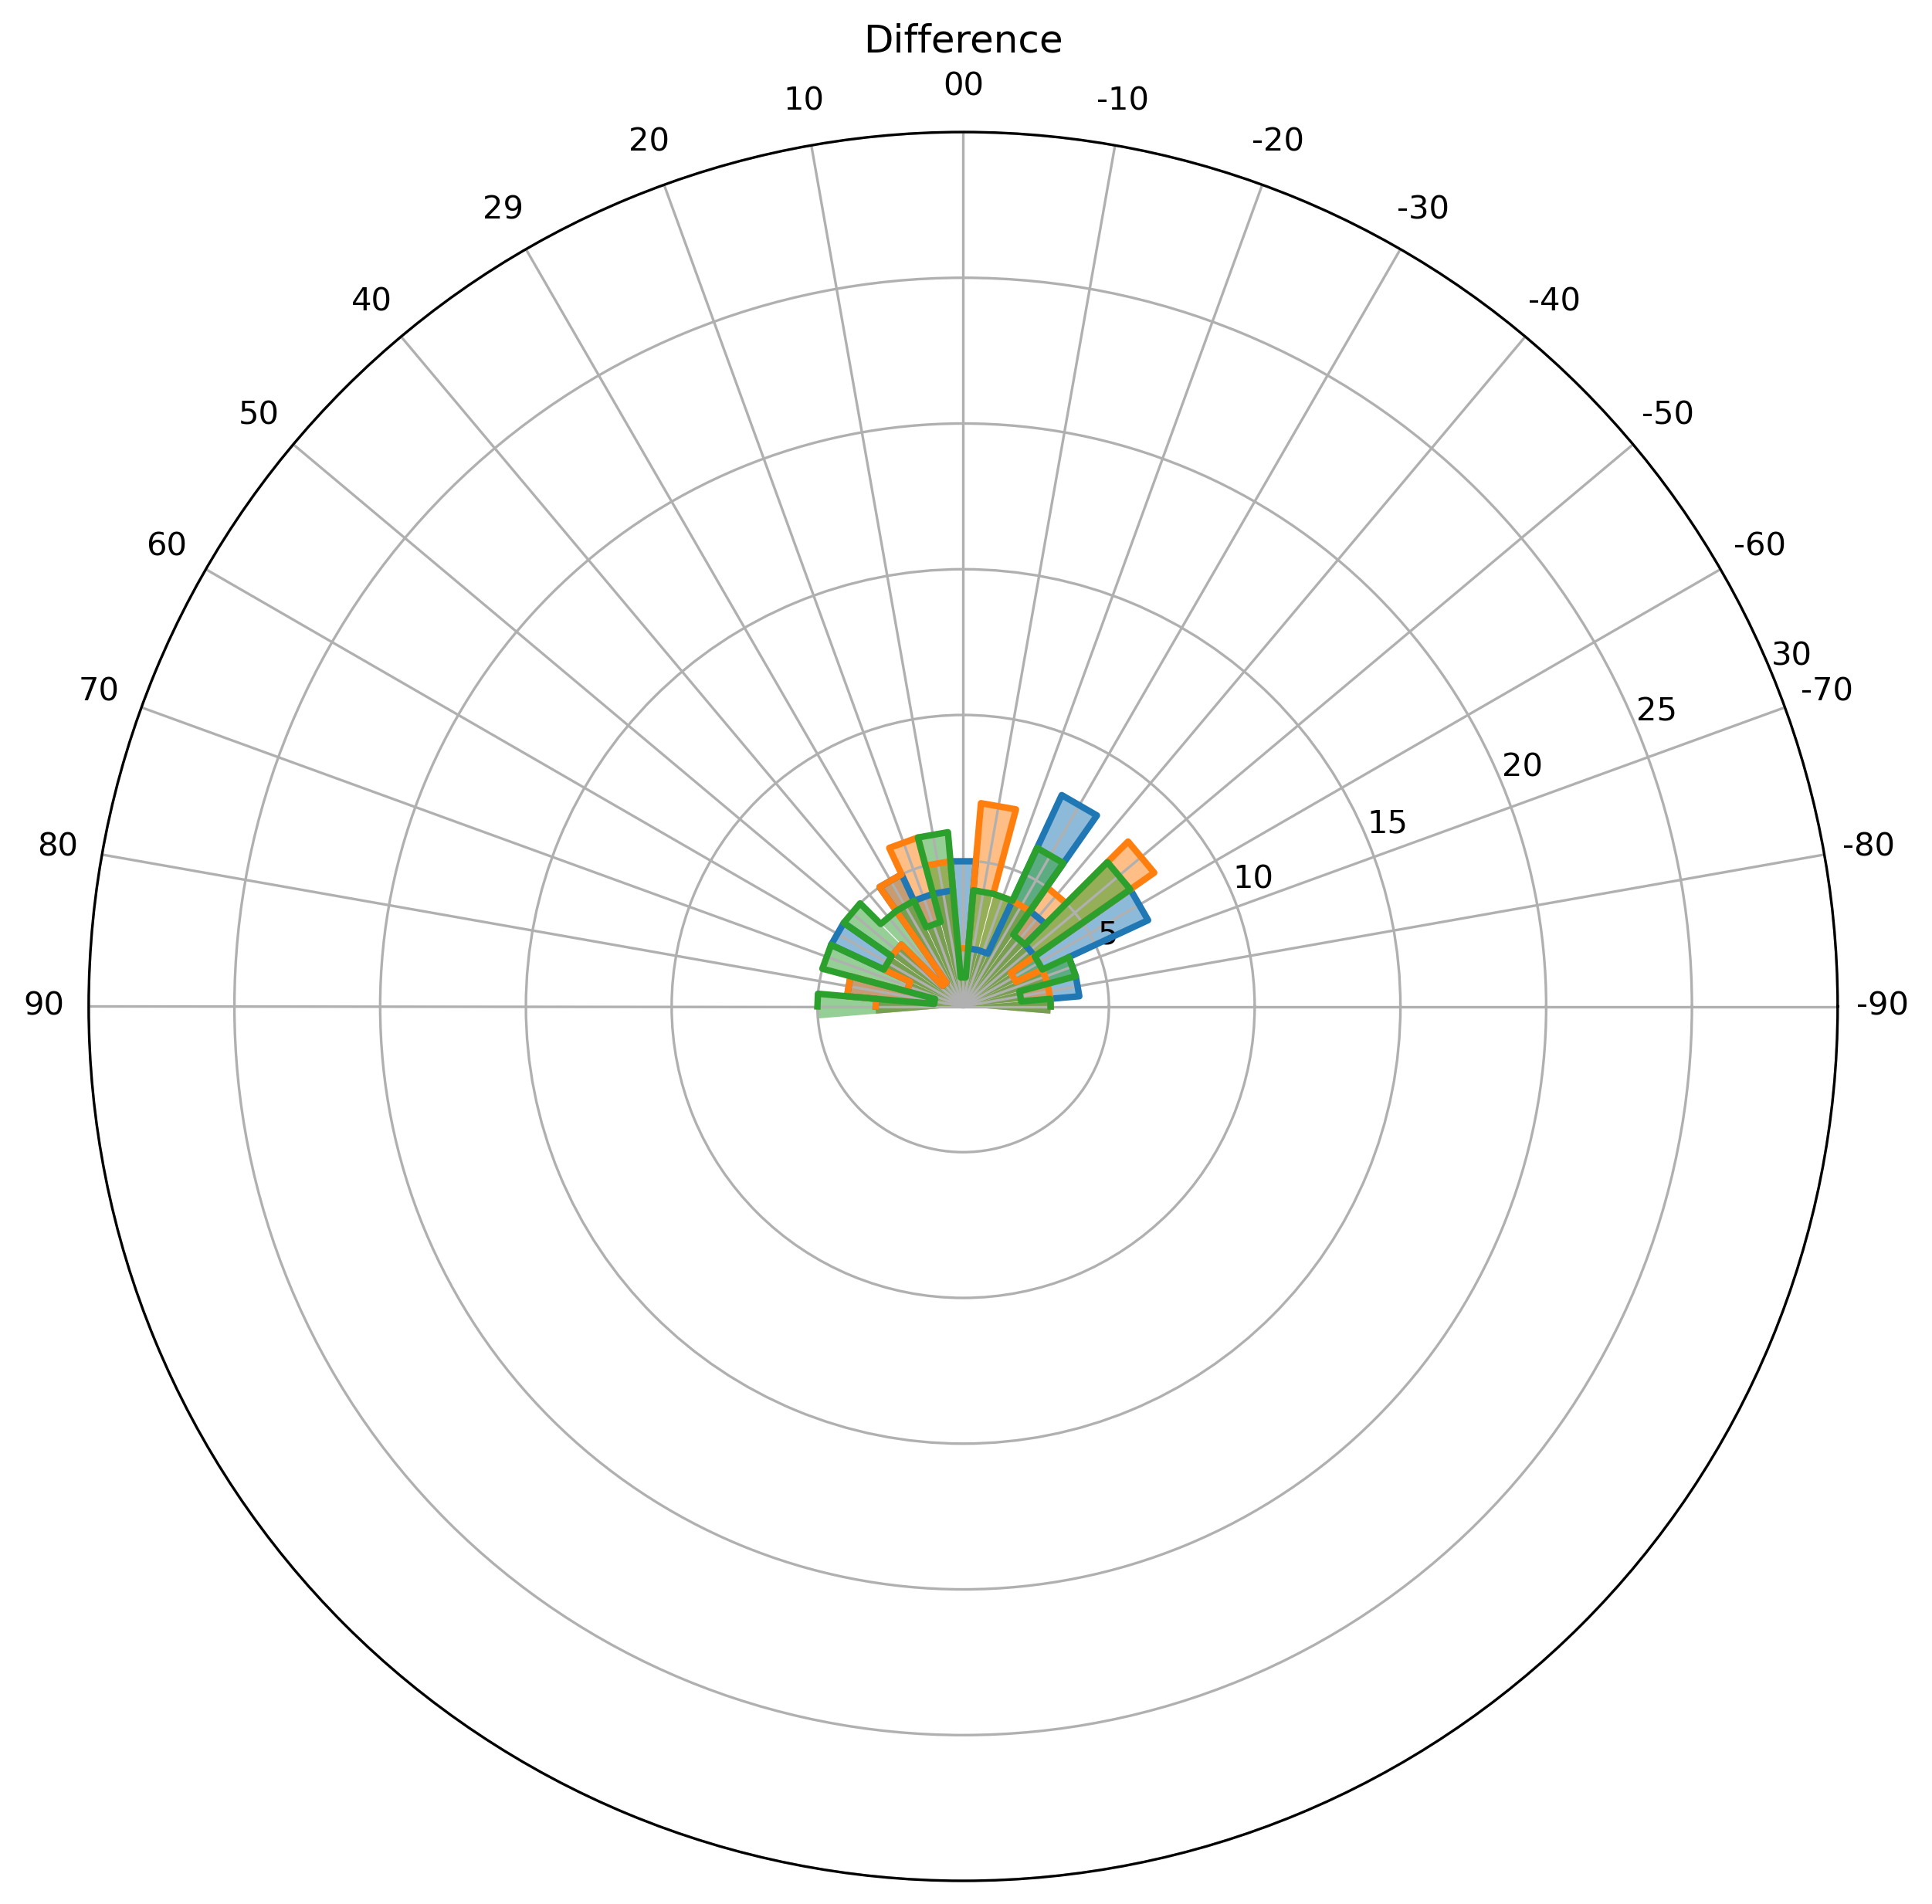

In [157]:
import matplotlib.pyplot as plt
import numpy as np

def make_radar_chart(name, 
                     stats, 
                     attribute_labels = "", 
                     plot_markers = "", 
                     plot_str_markers = "",
                    ax=None):

        
    labels = np.array(attribute_labels)
    angles = np.linspace(0, np.pi, len(stats[0]), endpoint=True)
    
    outline_pos = [(angles[0])]
    for i in range(len(angles)-1):
        outline_pos.append(((angles[i]+angles[i+1])/2))
        outline_pos.append(((angles[i]+angles[i+1])/2))
    outline_pos.append((angles[-1]))

    outline_value = [stats[0][0]]
    for i in range(len(stats[0])-1):
        outline_value.append(stats[0][i])
        outline_value.append(stats[0][i+1])
    outline_value.append(stats[0][-1])
    
    stats = stats[0]
    
    
    if ax==None:
        fig= plt.figure(figsize=(10, 10), dpi=300)
        ax = fig.add_subplot(111, polar=True)
    ax.bar(angles, stats, width=(np.pi) / len(angles), alpha=0.5)

    ax.plot(outline_pos, outline_value, '-', linewidth=2)
    
    sr = []
    for r in angles:
        r = r * 180/np.pi -90
        sr.append('%02i' % r)
    ax.set_thetagrids(angles * 180/np.pi, sr)
    ax.set_ylim(0, 30)
    ax.set_title(name)
    ax.grid(True)


    return ax
data['angle_'] = [180+a if a<0 else a for a in data.angle]
data['angle_position_degre_'] = [180+a if a<0 else a for a in data.angle_position_degre]
data['diff'] = (data['angle_position_degre_'] - data['angle_'])
data['diff'] = [180-a if a>90 else a for a in data['diff']]
data['diff'] = [-180-a if a<-90 else a for a in data['diff']]

n1 = np.histogram(data.loc['1']['diff'], bins=19, range=(-90,90))
n2 = np.histogram(data.loc['2']['diff'], bins=19, range=(-90,90))
n3 = np.histogram(data.loc['3']['diff'], bins=19, range=(-90,90))

ax = make_radar_chart("Difference", n1) # example
ax = make_radar_chart("Difference", n2, ax=ax) # example
ax = make_radar_chart("Difference", n3, ax=ax) # example

# plt.savefig("radar_bar_ctl_90_90-30.eps", dpi=300)

In [65]:
# data.to_csv("apopto.csv")



In [33]:
data_apopto[:10]

,area,x,y,major,minor,angle,AR,x_a,y_a,angle_position,angle_position_degre,angle_,angle_position_degre_,diff
apo1,28.905,22.078,15.122,8.948,4.113,171.154,2.175541,NaN,NaN,NaN,NaN,171.154,NaN,NaN
apo2,0.234,20.264,15.550,0.680,0.438,161.565,1.552511,NaN,NaN,NaN,NaN,161.565,NaN,NaN
apo3,0.468,20.048,16.112,1.148,0.519,154.330,2.211946,NaN,NaN,NaN,NaN,154.330,NaN,NaN
1,11.786,13.309,13.002,4.177,3.592,126.608,1.162862,-8.769,2.120,2.904383,166.408916,126.608,166.408916,39.800916
2,7.203,16.957,14.698,4.317,2.124,131.424,2.032486,-3.307,0.852,2.889441,165.552764,131.424,165.552764,34.128764
3,8.325,16.659,14.209,6.413,1.653,138.638,3.879613,-3.389,1.903,2.629946,150.684806,138.638,150.684806,12.046806
1,43.732,19.568,10.989,10.174,5.473,15.766,1.858944,-2.510,4.133,2.116571,121.270605,15.766,121.270605,105.504605
2,23.058,19.493,12.202,5.802,5.060,43.839,1.146640,-0.771,3.348,1.797137,102.968367,43.839,102.968367,59.129367
3,24.368,18.273,11.317,6.311,4.917,89.492,1.283506,-1.775,4.795,1.925332,110.313407,89.492,110.313407,20.821407
1,7.858,24.703,9.619,5.363,1.865,112.047,2.875603,2.625,5.503,1.125707,64.498273,112.047,64.498273,-47.548727


In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats 
data_apopto = pd.read_csv("apopto.csv", index_col='Unnamed: 0', sep=',')
print(stats.levene(data_apopto.loc['1']['diff'], data_apopto.loc['2']['diff']))
print(stats.levene(data_apopto.loc['2']['diff'], data_apopto.loc['3']['diff']))
print(stats.levene(data_apopto.loc['1']['diff'], data_apopto.loc['3']['diff']))

LeveneResult(statistic=71.23570579935371, pvalue=2.6688152645359876e-15)
LeveneResult(statistic=5.578337309498777, pvalue=0.01895746716872697)
LeveneResult(statistic=26.04485575877279, pvalue=6.641068817515863e-07)


In [2]:
from scipy import stats 
data_ctl = pd.read_csv("ctl.csv", index_col='Unnamed: 0', sep=',')
print(stats.levene(data_ctl.loc['1']['diff'], data_ctl.loc['2']['diff']))
print(stats.levene(data_ctl.loc['2']['diff'], data_ctl.loc['3']['diff']))
print(stats.levene(data_ctl.loc['1']['diff'], data_ctl.loc['3']['diff']))

LeveneResult(statistic=0.04192070460854384, pvalue=0.8380601141411572)
LeveneResult(statistic=0.3115962884045512, pvalue=0.5775691605114673)
LeveneResult(statistic=0.6257270832201658, pvalue=0.43022791727704224)


In [14]:
print(stats.levene(data_ctl.loc["1"]['diff'], data_apopto.loc["1"]['diff']))
print(stats.levene(data_ctl.loc["1"]['diff'], data_apopto.loc["2"]['diff']))
print(stats.levene(data_ctl.loc["1"]['diff'], data_apopto.loc["3"]['diff']))

LeveneResult(statistic=2.7679644082145574, pvalue=0.09776640755714111)
LeveneResult(statistic=38.41053116221522, pvalue=3.317441002887291e-09)
LeveneResult(statistic=8.808120028346728, pvalue=0.003372594017208928)


In [100]:
data_apopto_short = pd.DataFrame(data=np.array((data_apopto.loc['1']['angle_'].to_numpy(),
                                               data_apopto.loc['2']['angle_'].to_numpy(),
                                               data_apopto.loc['3']['angle_'].to_numpy())).T,
                                 columns=list('123')
                                 )

data_ctl_short = pd.DataFrame(data=np.array((data_ctl.loc['1']['angle_'].to_numpy(),
                                               data_ctl.loc['2']['angle_'].to_numpy(),
                                               data_ctl.loc['3']['angle_'].to_numpy())).T,
                                 columns=list('123')
                                 )

(array([71., 27., 12.,  3.,  2.,  4.,  1.,  0.,  3.,  2.]),
 array([ 0.182 ,  8.6841, 17.1862, 25.6883, 34.1904, 42.6925, 51.1946,
        59.6967, 68.1988, 76.7009, 85.203 ]),
 <BarContainer object of 10 artists>)

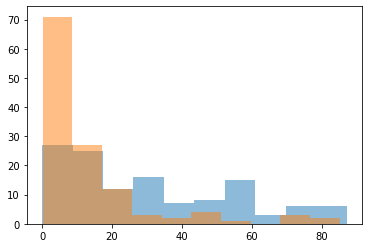

In [124]:
t0_t_10 = abs(data_apopto.loc['1']['angle_'].to_numpy() - data_apopto.loc['2']['angle_'].to_numpy())

for a in range(len(t0_t_10)):
    if t0_t_10[a]>90:
        t0_t_10[a]=180-t0_t_10[a]

t10_t0 = abs(data_apopto.loc['2']['angle_'].to_numpy() - data_apopto.loc['3']['angle_'].to_numpy())

for a in range(len(t10_t0)):
    if t10_t0[a]>90:
        t10_t0[a]=180-t10_t0[a]
        
        
plt.hist(t0_t_10, alpha=0.5)
plt.hist(t10_t0, alpha=0.5)

<AxesSubplot:>

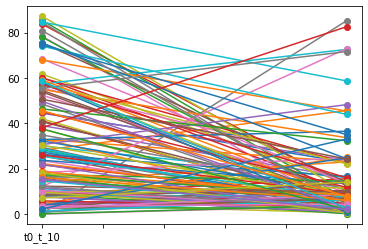

In [125]:
pd.DataFrame(data=np.array((list(t0_t_10), list(t10_t0))).T, columns=['t0_t_10', 't10_t0']).T.plot(marker='o',legend=False)

(array([33., 12., 12.,  8.,  2.,  2.,  1.,  1.,  0.,  2.]),
 array([ 0.229 ,  8.6881, 17.1472, 25.6063, 34.0654, 42.5245, 50.9836,
        59.4427, 67.9018, 76.3609, 84.82  ]),
 <BarContainer object of 10 artists>)

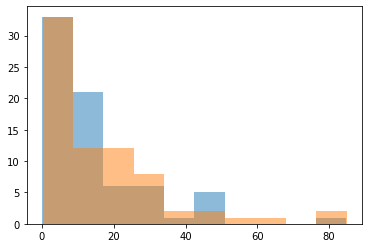

In [126]:
t0_t_10 = abs(data_ctl.loc['1']['angle_'].to_numpy() - data_ctl.loc['2']['angle_'].to_numpy())
for a in range(len(t0_t_10)):
    if t0_t_10[a]>90:
        t0_t_10[a]=180-t0_t_10[a]

t10_t0 = abs(data_ctl.loc['2']['angle_'].to_numpy() - data_ctl.loc['3']['angle_'].to_numpy())
for a in range(len(t10_t0)):
    if t10_t0[a]>90:
        t10_t0[a]=180-t10_t0[a]
plt.hist(t0_t_10, alpha=0.5)
plt.hist(t10_t0, alpha=0.5)

<AxesSubplot:>

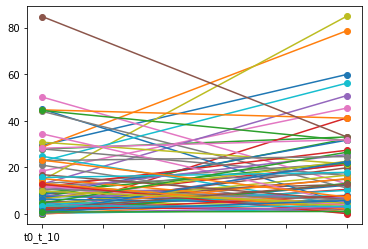

In [127]:
pd.DataFrame(data=np.array((list(t0_t_10), list(t10_t0))).T, columns=['t0_t_10', 't10_t0']).T.plot( marker='o', legend=False)


In [118]:
pd.DataFrame(data=np.array((list(t0_t_10), list(t10_t0))).T, columns=['t0_t_10', 't10_t0'])

,t0_t_10,t10_t0
0,29.534,59.867
1,151.276,-101.414
2,-27.883,146.896
3,0.211,138.785
4,-1.985,21.871
...,...,...
68,-9.840,-4.726
69,3.482,3.317
70,-1.161,5.808
71,-23.148,7.337


<AxesSubplot:>

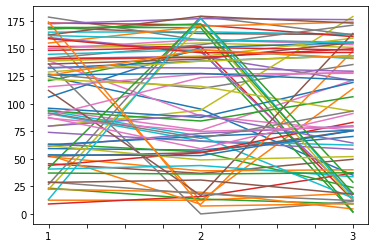

In [101]:
data_ctl_short.T.plot(legend=False)

<AxesSubplot:>

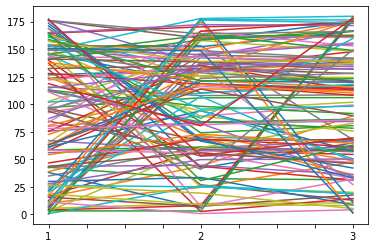

In [102]:
data_apopto_short.T.plot(legend=False)

In [43]:
print(stats.ttest_rel(data_ctl_short['1'], data_ctl_short['2']))
print(stats.ttest_rel(data_ctl_short['2'], data_ctl_short['3']))

Ttest_relResult(statistic=0.13148391874977072, pvalue=0.8957592261881573)
Ttest_relResult(statistic=1.3493139245598567, pvalue=0.1814640108601416)


In [41]:
print(stats.ttest_rel(data_apopto_short['1'], data_apopto_short['2']))
print(stats.ttest_rel(data_apopto_short['2'], data_apopto_short['3']))

Ttest_relResult(statistic=-1.3950492598646185, pvalue=0.1654947131834514)
Ttest_relResult(statistic=0.16972159389964075, pvalue=0.8655056720052624)


In [29]:


dataii = data.loc['2']

interval = 30
for a in range(0,180, interval):
    ref_angle = a+interval/2
    print(a, ref_angle, a+interval)
    res = dataii[(dataii.angle_position_degre_>=a) & (dataii.angle_position_degre_<a+interval)]
    print(res.angle.to_numpy())
    print(res.angle_.to_numpy())
    if ref_angle<0:
        ref_angle = 180+ref_angle
    print(ref_angle)
#     print(stats.ttest_1samp(res.angle_, popmean=ref_angle))
    print(np.var(res.dist), np.var([ref_angle-interval/2, ref_angle+interval/2]))
    print(stats.levene(res.dist, [ref_angle-interval/2, ref_angle+interval/2]))
    print('')

-180 -165.0 -150
[24.572  8.027  3.147]
[24.572  8.027  3.147]
15.0
84.06467222222221 225.0
LeveneResult(statistic=1.538054370420063, pvalue=0.3030663083469326)

-150 -135.0 -120
[89.174 58.887 61.116]
[89.174 58.887 61.116]
45.0
189.9469082222223 225.0
LeveneResult(statistic=0.17800088299981368, pvalue=0.701505801281486)

-120 -105.0 -90
[110.327  68.197  95.629]
[110.327  68.197  95.629]
75.0
304.8314142222221 225.0
LeveneResult(statistic=0.008741730693224831, pvalue=0.931402872577879)

-90 -75.0 -60
[152.22   60.121  71.841]
[152.22   60.121  71.841]
105.0
1675.5964268888886 225.0
LeveneResult(statistic=0.2353192911570858, pvalue=0.6608250821669496)

-60 -45.0 -30
[137.134 163.842  19.348]
[137.134 163.842  19.348]
135.0
3940.5972328888893 225.0
LeveneResult(statistic=0.5191344944165932, pvalue=0.523278295010638)

-30 -15.0 0
[132.232 176.789  72.775]
[132.232 176.789  72.775]
165.0
1815.485921555555 225.0
LeveneResult(statistic=0.7277672910979969, pvalue=0.45630561169884076)

0 15.

/home/admin-suz/miniconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2439: RuntimeWarning: divide by zero encountered in double_scalars
  W = numer / denom
